### Special Example 1 - Functional T-Test

### 1.1 What's the goal?

The goal of this example is to perform a functional t-Test to compare groups of functions.

For this let us assume, that we have two groups of functions. You may define them by points, which may be connected ba linaer functions or directly using casadi.

### 1.2 What to do?

First of all we need data. In this example we will consider random data, but you may use explicit data from experiments.\
We need casadi to define a function that is dependent on a variable x.

Here we will use random sample data and connect the datapoints by linear functions. Therefore, we will use the statsmed.punkt_def_function, which takes as input the x variable from casadi, the x - data and y - data from the experiments. The Function will be zero before and after the last datapoint.

f_list1 and f_list2 contains each 50 random functions - so we now have two groups of functions.
Please note here that the y - data of the functions in f_list2 are +1 in comparision to f_list1 so the question is can we proove that they are different?

The functions will be sampled using the sampler. It defines where the functional t-test will be evaluated and/or the functions plotted. This does implies that you may specifically define the functions on the sampler. So for example if you do not want the functions to be zero before and after the functions, you may add an aditional datapoint to the definition data for the functions that define the first and last datapoint dependet on your sampler.


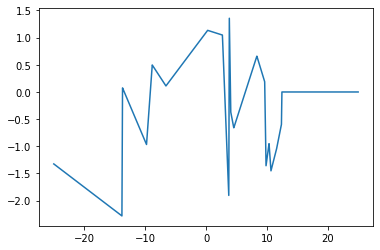

In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from statsmed import statsmed

# Casadi definition of variable x
x = ca.SX.sym('x')

# Define first group of functions f_list1 by using random data. 
f_list1 = []
for i in range(50):
    f_list1 += [statsmed.punkt_def_function(x,np.sort(np.random.randn(20)*10),np.random.randn(20))]

# Define second group of functions f_list1 by using random data.
f_list2 = []
for i in range(50):
    f_list2 += [statsmed.punkt_def_function(x,np.sort(np.random.randn(20)*10),np.random.randn(20)+1)]

# Define sampler of the functions to plot them.
sampler = np.arange(0,5000)/100-(5000/200)

# Evaluate first function from function list one using the sampler
f_example_eval = ca.Function('f_example_eval', [x], [f_list1[0]])

# Plot first function from function list one using the sampler
plt.plot(sampler,f_example_eval(sampler))



This is an example plot of the first function in the list of example functions of group one.

In the following we will plot the mean, variance and T-value function of the f_list1 and f_list2 group.

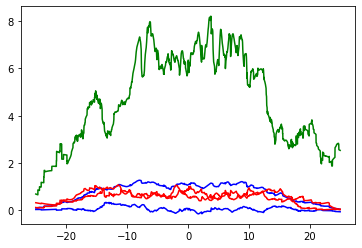

In [2]:
mean_f1 = statsmed.mean_function(f_list1)
var_f1 = statsmed.var_function(f_list1)

mean_f2 = statsmed.mean_function(f_list2)
var_f2 = statsmed.var_function(f_list2)

Tfun_f = statsmed.Tfun(f_list1,f_list2)

fm_eval1 = ca.Function('f_eval1', [x], [mean_f1])
plt.plot(sampler,fm_eval1(sampler),'b')
fm_eval2 = ca.Function('f_eval2', [x], [mean_f2])
plt.plot(sampler,fm_eval2(sampler),'b')

fv_eval1 = ca.Function('f_eval1', [x], [var_f1])
plt.plot(sampler,fv_eval1(sampler),'r')
fv_eval2 = ca.Function('f_eval2', [x], [var_f2])
plt.plot(sampler,fv_eval2(sampler),'r')

Tf_eval = ca.Function('f_eval1', [x], [Tfun_f])
plt.plot(sampler,Tf_eval(sampler),'g')



Here we see that the mean of one group of functions differes from the other group, while the variances of the groups of functions appear more similar. We also see that if the difference between the mean-functions get larger also the T-value function gets larger. But this is only the case because the variance is almost equal.

Now we can perform the functional t-test. First using all permuatation. Here we only used the first 5 functions in each group as the number of all possible permutations grows extremely fast, but if you only have a small number of functions in your groups this may be usefull.

statsmed.functional_t_test_all_perm returns the maximal T-value of the original data and a p-value.

In [3]:
print(statsmed.functional_t_test_all_perm(x,f_list1[:5],f_list2[:5],sampler))

[4.893595241601796, 'p = 0.06']


So for the first 5 functions in each group we may not say that there is a significant difference between the groups of functions.

Let us now perform this with a number of random permutations (100).

In [4]:
print(statsmed.functional_t_test(x,f_list1[:5],f_list2[:5],sampler,100))

[4.893595241601796, 'p = 0.15']


It also returns the maximal T-value of the original data and a p-value, but again this is not significant due to the low number of functions.

Therefore we will now include all functions and see if there is a significant difference.

In [5]:
print(statsmed.functional_t_test(x,f_list1,f_list2,sampler,100))

[8.209861323252001, 'p < 0.001']


So we have a p value below 0.001 indicating a significant difference between the groups of functions.